In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from salishsea_tools.nc_tools import scDataset
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/transport_fluxes/')
import functions_transport_W
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

In [2]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/realistic/sbcana_forcings/agrif_wind_timestep/'
filename = 'nocanyon/1_mesh_mask.nc'
gdepwn, tmaskn, mbathyn, e1tn, e2tn = functions_transport_W.get_variables_planes(dirname, filename)

filename = 'canyoncase/1_mesh_mask.nc'
gdepw, tmask, mbathy, e1t, e2t = functions_transport_W.get_variables_planes(dirname, filename)

mbathy.shape, e1t.shape, e2t.shape, tmask.shape

((272, 182), (272, 182), (272, 182), (80, 272, 182))

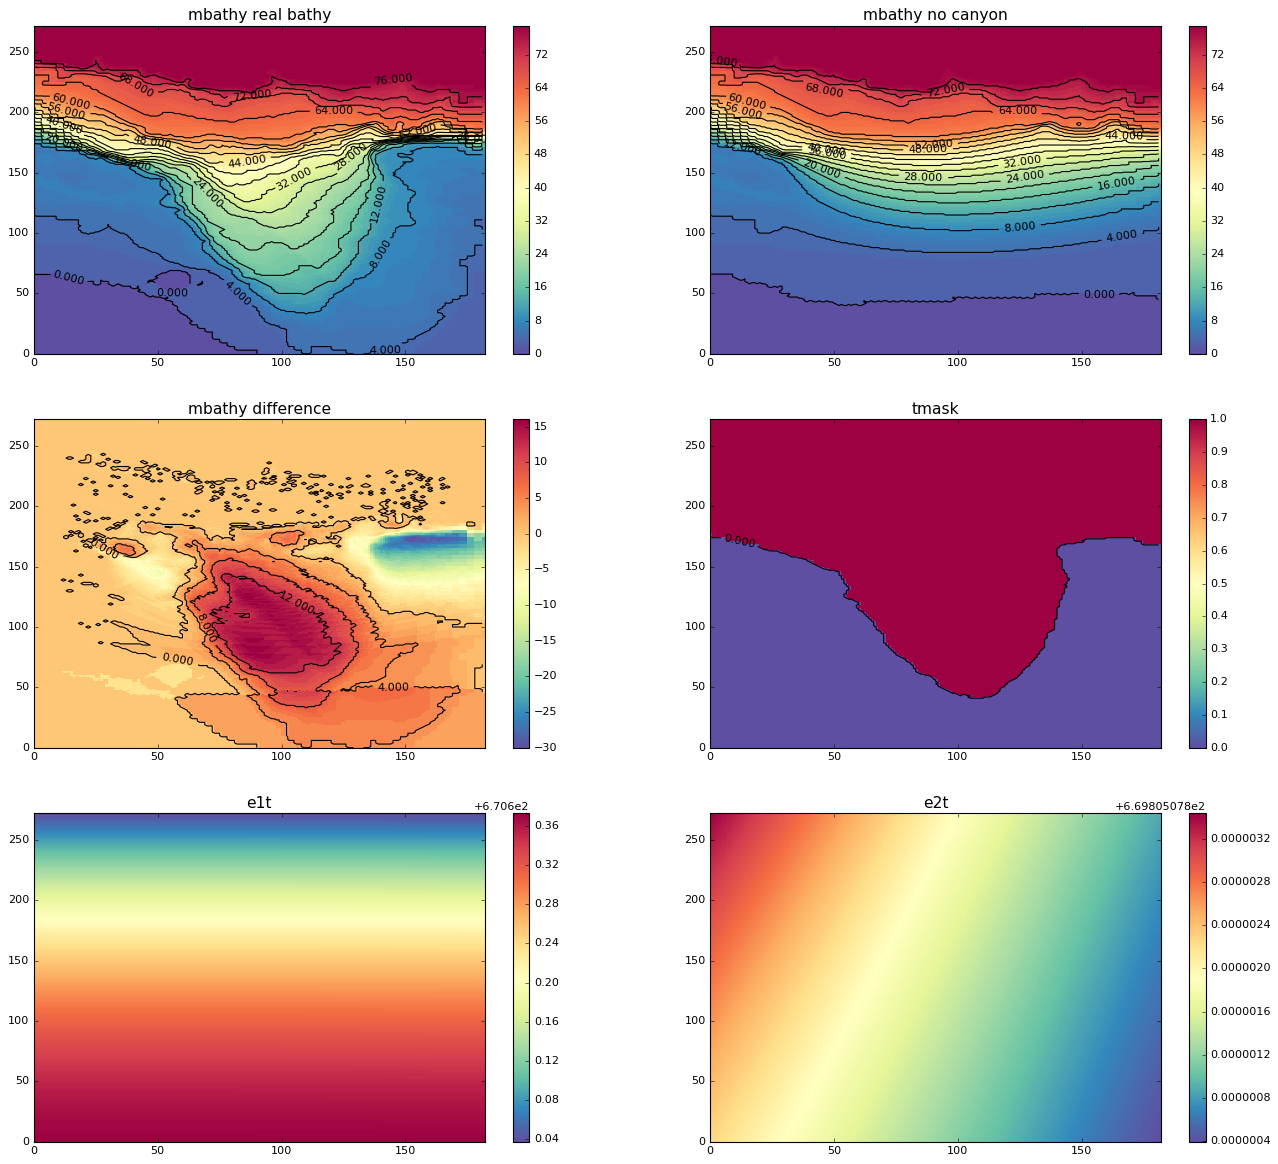

In [3]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(20, 18))
ttls = ['mbathy real bathy', 'mbathy no canyon', 'mbathy difference', 'tmask', 'e1t', 'e2t']
plots = [mbathy, mbathyn, mbathy-mbathyn, tmask[10, :, :], e1tn, e2tn]
for n, ax, plot, ttl in zip(np.arange(len(ttls)), [ax1, ax2, ax3, ax4, ax5, ax6], plots, ttls):
    p = ax.pcolormesh(plot, cmap=cm.Spectral_r)
    fig.colorbar(p, ax=ax)
    c = ax.contour(plot, levels = np.arange(0,80,4), colors='k')
    ax.clabel(c, inline=1, fontsize=10)
    ax.set_title(ttl, fontsize=14)

In [4]:
surface_mask = functions_transport_W.build_surface_mask(tmaskn, mbathyn)

In [6]:
xs = np.arange(mbathyn.shape[-1])
ys = np.arange(mbathyn.shape[-2])

In [7]:
def plot_surface_mask(surface_mask, N, deps):
    fig, ax = plt.subplots(1, N, figsize=(20, 5), sharey=True)
    ax[0].set_ylabel('y inds', fontsize=14)
    for n, dep in zip(np.arange(N), deps):
        p = ax[n].pcolormesh(surface_mask[dep, :, :], cmap=cm.hot_r)
        plt.setp( ax[n].get_xticklabels(), visible=False)
        ax[n].set_title(str(dep) + ' = ' + str(int(gdepwn[dep])) + ' m', fontsize=14)
        ax[n].grid()
        ax[n].set_xlim([0, surface_mask.shape[-1]])
        ax[n].set_ylim([0, surface_mask.shape[-2]])
        ax[n].set_xlabel('x inds', fontsize=14)
    fig.suptitle('Surface Mask at every depth index (black=1, white=0)', fontsize=18)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    ax1.plot(mbathyn[:, int(0.5*mbathyn.shape[-1])], linewidth=2, c='k')
    ax1.set_ylim([deps[-1], deps[0]])
    ax1.grid()
    ax1.set_xlabel('y inds', fontsize=14)
    ax1.set_ylabel('z inds', fontsize=14)
    ax1.set_title('depth ind profile', fontsize=14)
    ax2.pcolormesh(xs, ys, mbathyn, cmap=cm.Spectral_r)
    c = ax2.contour(xs, ys, mbathyn, levels = deps, colors='k')
    ax2.clabel(c, inline=1, fontsize=10)
    ax2.set_xlabel('x inds', fontsize=14)
    ax2.set_ylabel('y inds', fontsize=14)
    ax2.set_title('mbathy with depth ind steps', fontsize=14)
    return fig

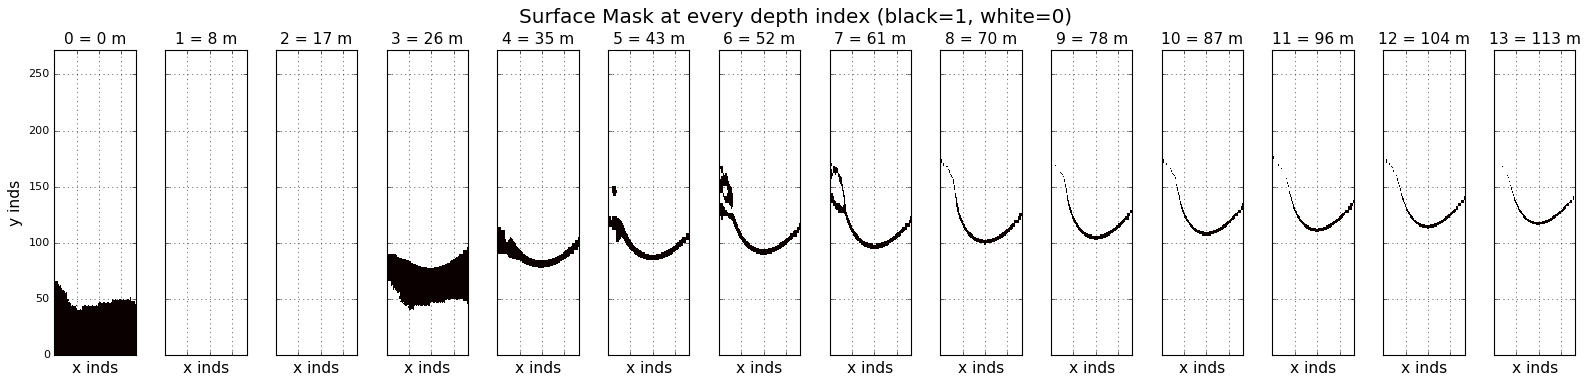

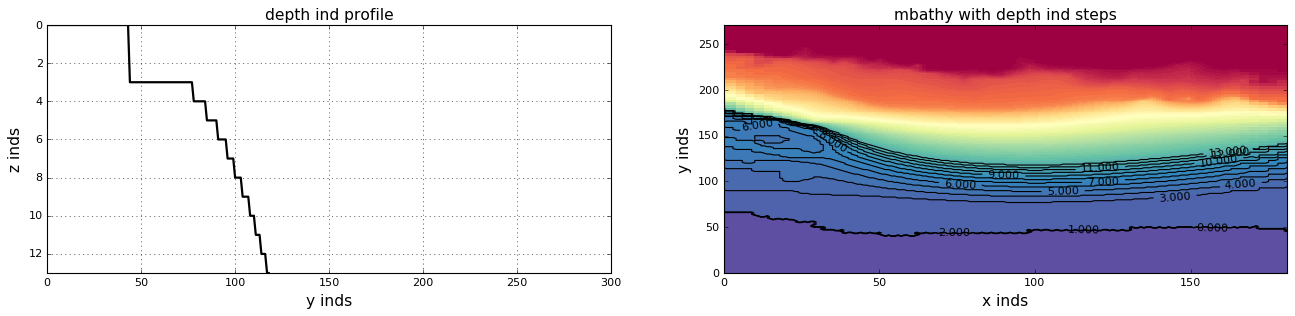

In [8]:
N = 14
deps = np.arange(0, 0+N)
fig = plot_surface_mask(surface_mask, N, deps)

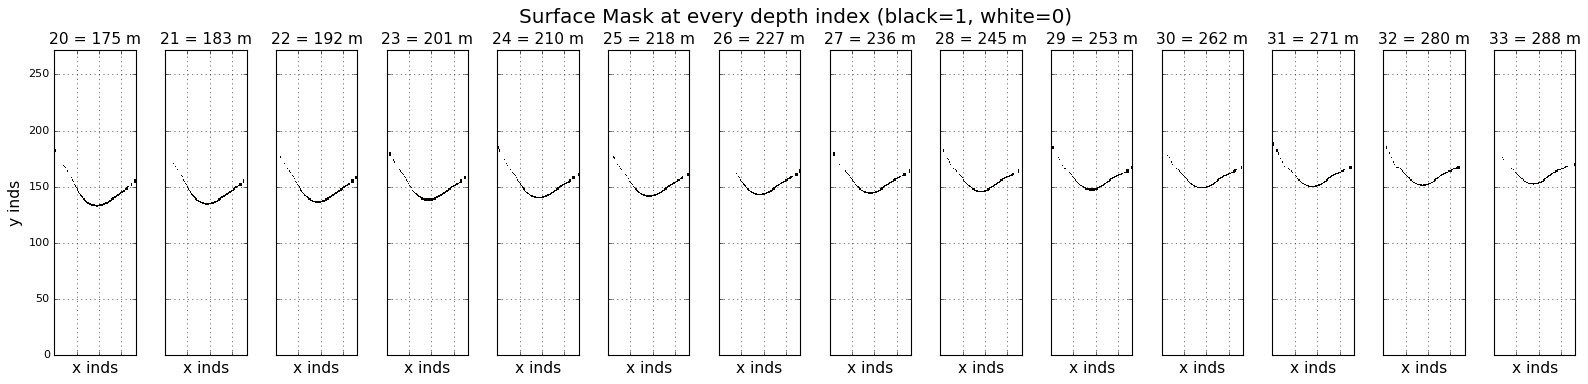

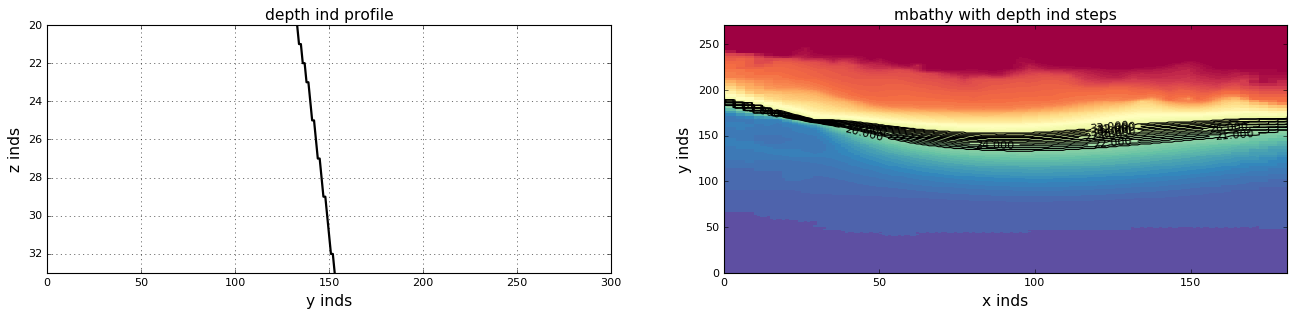

In [9]:
N = 14
deps = np.arange(20, 20+N)
fig = plot_surface_mask(surface_mask, N, deps)

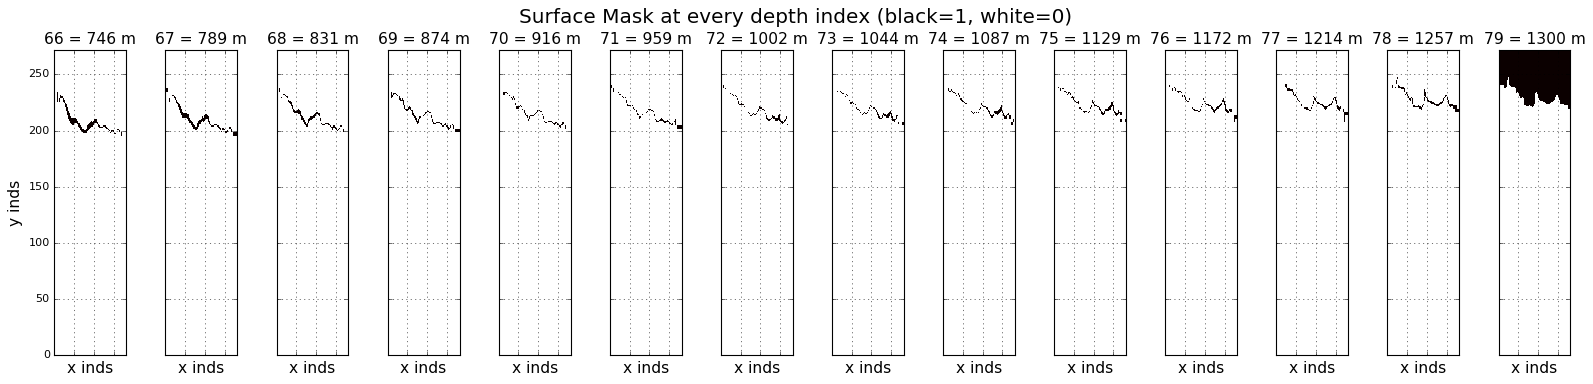

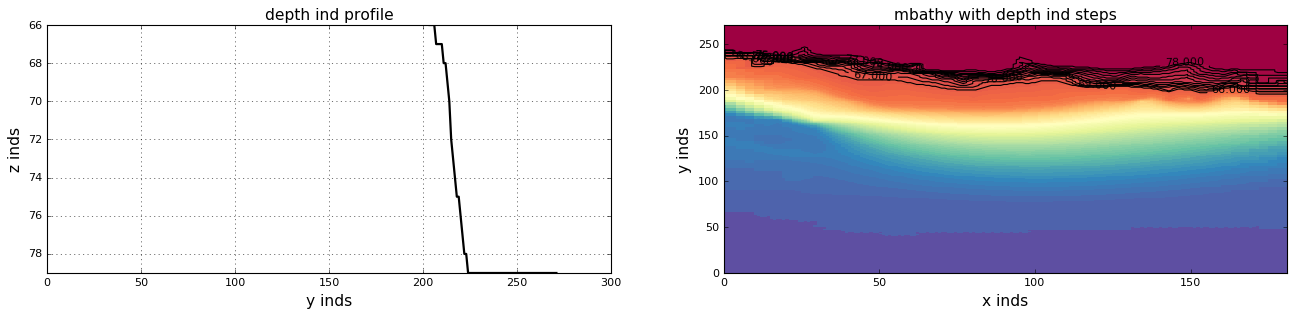

In [10]:
N = 14
deps = np.arange(66, 66+N)
fig = plot_surface_mask(surface_mask, N, deps)